In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


## 📊 Load and Analyze Data


In [2]:
# Load and analyze annual statistics data
annual_stats_path = Path("data/processed_earthquake_catalog_annual_stats.csv")

if annual_stats_path.exists():
    df_annual = pd.read_csv(annual_stats_path)
    print(f"📊 Annual statistics data loaded: {len(df_annual)} records")
    print(f"📅 Year range: {df_annual['year'].min()} - {df_annual['year'].max()}")
    print(f"🗂️ Number of bins: {df_annual['bin_id'].nunique()}")
    
 
    print(df_annual)
    
    # Analyze data completeness
    year_range = df_annual['year'].max() - df_annual['year'].min() + 1
    total_bins = df_annual['bin_id'].nunique()
    expected_records = year_range * total_bins
    actual_records = len(df_annual)
    
    print(f"\n🔍 DATA COMPLETENESS ANALYSIS:")
    print(f"Expected records (years × bins): {expected_records}")
    print(f"Actual records: {actual_records}")
    print(f"Missing records: {expected_records - actual_records}")
    print(f"Completeness: {actual_records/expected_records*100:.1f}%")
    
    # Analyze zero frequency occurrences
    zero_freq = (df_annual['frequency'] == 0).sum()
    print(f"\n📉 ZERO FREQUENCY ANALYSIS:")
    print(f"Records with zero frequency: {zero_freq}")
    print(f"Percentage of zero frequency: {zero_freq/len(df_annual)*100:.1f}%")
    
else:
    print("⚠️ Annual statistics file not found. Run preprocessing first.")
    df_annual = None


📊 Annual statistics data loaded: 2900 records
📅 Year range: 1910.0 - 2025.0
🗂️ Number of bins: 25
        year  bin_id  max_magnitude  avg_magnitude  avg_depth  frequency
0     1910.0    -1.0            0.0          0.000       10.0        0.0
1     1910.0     0.0            0.0          0.000       10.0        0.0
2     1910.0     1.0            0.0          0.000       10.0        0.0
3     1910.0     2.0            0.0          0.000       10.0        0.0
4     1910.0     3.0            7.5          7.500       33.0        1.0
...      ...     ...            ...            ...        ...        ...
2895  2025.0    19.0            5.1          5.050       14.0        2.0
2896  2025.0    20.0            5.6          5.175       31.5        4.0
2897  2025.0    21.0            5.3          5.150        9.5        2.0
2898  2025.0    22.0            5.0          5.000       27.0        1.0
2899  2025.0    23.0            5.3          5.300        1.0        1.0

[2900 rows x 6 columns]



YEAR BY YEAR FREQUENCY ANALYSIS

shows exactly which bins have 0 frequency for each year in the format you requested.


In [3]:
# 🎯 DETAILED YEAR-BY-YEAR BIN FREQUENCY ANALYSIS
# This shows exactly which bins have 0 frequency for each year

if df_annual is not None:
    print("🔍 COMPREHENSIVE BIN FREQUENCY ANALYSIS BY YEAR")
    print("=" * 80)
    print("Format: YEAR: BIN_ID - FREQUENCY")
    print("=" * 80)
    
    # Get all unique years and bins for complete analysis
    all_years = sorted(df_annual['year'].unique())
    all_bins = sorted(df_annual['bin_id'].unique())
    
    print(f"\n📊 Dataset Overview:")
    print(f"• Years: {all_years[0]} - {all_years[-1]} ({len(all_years)} years)")
    print(f"• Bins: {len(all_bins)} bins (IDs: {all_bins})")
    print(f"• Expected combinations: {len(all_years) * len(all_bins)}")
    print(f"• Actual records: {len(df_annual)}")
    
    # Create a summary for each year showing all bins and their frequencies
    for year in all_years:
        year_data = df_annual[df_annual['year'] == year]
        
        print(f"\n📅 {year}:")
        print("-" * 40)
        
        # Create a dictionary of bin frequencies for this year
        bin_frequencies = {}
        for _, row in year_data.iterrows():
            bin_frequencies[row['bin_id']] = row['frequency']
        
        # Show all bins for this year (including missing ones as 0)
        bins_with_zero = []
        bins_with_events = []
        
        for bin_id in all_bins:
            frequency = bin_frequencies.get(bin_id, 0)  # Default to 0 if bin not present
            
            if frequency == 0:
                bins_with_zero.append(bin_id)
            else:
                bins_with_events.append((bin_id, frequency))
        
        # Display in the requested format
        # First show bins with events
        if bins_with_events:
            for bin_id, freq in bins_with_events:
                print(f"   BIN {bin_id:2f} - {freq}")
        
        # Then show bins with zero frequency
        if bins_with_zero:
            print(f"   🔴 ZERO FREQUENCY BINS: {bins_with_zero}")
        
        # Summary for this year
        total_bins_with_data = len(year_data)
        bins_with_zero_count = len(bins_with_zero)
        print(f"   📊 Summary: {total_bins_with_data} bins with data, {bins_with_zero_count} bins with zero frequency")
    
    # Overall summary
    print(f"\n🎯 OVERALL SUMMARY:")
    print("=" * 50)
    
    # Count zero frequency records
    zero_freq_count = len(df_annual[df_annual['frequency'] == 0])
    total_records = len(df_annual)
    
    print(f"• Total years analyzed: {len(all_years)}")
    print(f"• Total bins: {len(all_bins)}")
    print(f"• Total possible bin-year combinations: {len(all_years) * len(all_bins)}")
    print(f"• Actual records in dataset: {total_records}")
    print(f"• Records with zero frequency: {zero_freq_count}")
    print(f"• Missing bin-year combinations: {(len(all_years) * len(all_bins)) - total_records}")
    print(f"• Data completeness: {(total_records / (len(all_years) * len(all_bins))) * 100:.1f}%")
    
    # Find most problematic bins (those with most zero frequencies)
    bins_zero_count = df_annual[df_annual['frequency'] == 0]['bin_id'].value_counts().sort_values(ascending=False)
    if len(bins_zero_count) > 0:
        print(f"\n🚨 BINS WITH MOST ZERO FREQUENCIES:")
        for bin_id, count in bins_zero_count.head(5).items():
            print(f"   Bin {bin_id}: {count} years with zero frequency")
    
    # Find most problematic years (those with most bins having zero frequency)
    years_zero_count = df_annual[df_annual['frequency'] == 0]['year'].value_counts().sort_values(ascending=False)
    if len(years_zero_count) > 0:
        print(f"\n📅 YEARS WITH MOST ZERO FREQUENCY BINS:")
        for year, count in years_zero_count.head(5).items():
            print(f"   {year}: {count} bins with zero frequency")

else:
    print("⚠️ No annual data available for analysis")


🔍 COMPREHENSIVE BIN FREQUENCY ANALYSIS BY YEAR
Format: YEAR: BIN_ID - FREQUENCY

📊 Dataset Overview:
• Years: 1910.0 - 2025.0 (116 years)
• Bins: 25 bins (IDs: [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0])
• Expected combinations: 2900
• Actual records: 2900

📅 1910.0:
----------------------------------------
   BIN 3.000000 - 1.0
   🔴 ZERO FREQUENCY BINS: [-1.0, 0.0, 1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
   📊 Summary: 25 bins with data, 24 bins with zero frequency

📅 1911.0:
----------------------------------------
   BIN 3.000000 - 1.0
   BIN 6.000000 - 1.0
   🔴 ZERO FREQUENCY BINS: [-1.0, 0.0, 1.0, 2.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
   📊 Summary: 25 bins with data, 23 bins with zero frequency

📅 1912.0:
-----------------------

## 📊 Visualize Data Sparsity and Zero Values


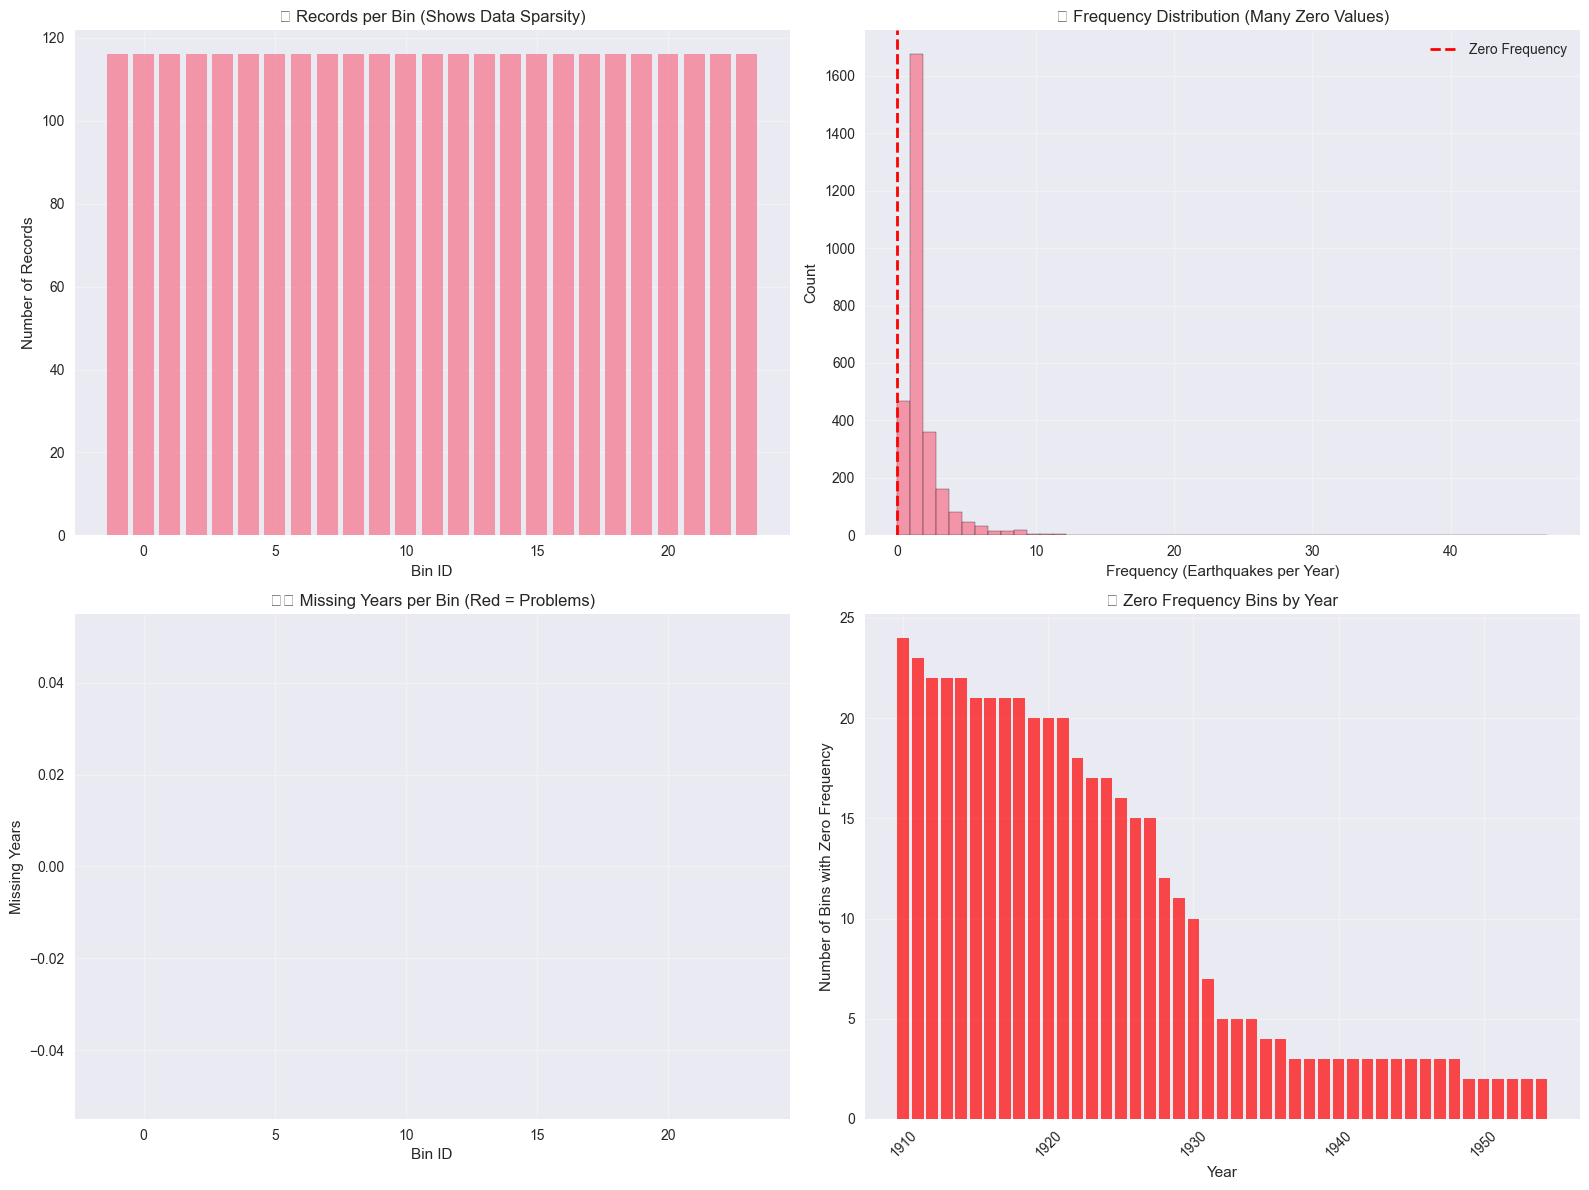


🔍 KEY INSIGHTS:
• 0 bins have missing years
• Maximum missing years in any bin: 0.0
• 466 records have zero frequency (16.1%)
• This explains data sparsity issues in LSTM training!


In [4]:
# Visualize data sparsity and zero values
if df_annual is not None:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Records per bin
    bin_counts = df_annual['bin_id'].value_counts().sort_index()
    ax1.bar(bin_counts.index, bin_counts.values, alpha=0.7)
    ax1.set_xlabel('Bin ID')
    ax1.set_ylabel('Number of Records')
    ax1.set_title('📊 Records per Bin (Shows Data Sparsity)')
    ax1.grid(True, alpha=0.3)
    
    # 2. Frequency distribution
    ax2.hist(df_annual['frequency'], bins=50, alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Frequency (Earthquakes per Year)')
    ax2.set_ylabel('Count')
    ax2.set_title('📈 Frequency Distribution (Many Zero Values)')
    ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Missing years per bin
    year_range = df_annual['year'].max() - df_annual['year'].min() + 1
    missing_per_bin = []
    bin_ids = sorted(df_annual['bin_id'].unique())
    
    for bin_id in bin_ids:
        bin_data = df_annual[df_annual['bin_id'] == bin_id]
        actual_years = len(bin_data)
        missing_years = year_range - actual_years
        missing_per_bin.append(missing_years)
    
    bars = ax3.bar(bin_ids, missing_per_bin, alpha=0.7, 
                   color=['red' if x > 0 else 'green' for x in missing_per_bin])
    ax3.set_xlabel('Bin ID')
    ax3.set_ylabel('Missing Years')
    ax3.set_title('🕳️ Missing Years per Bin (Red = Problems)')
    ax3.grid(True, alpha=0.3)
    
    # 4. Zero frequency by year
    zero_freq_by_year = df_annual[df_annual['frequency'] == 0]['year'].value_counts().sort_index()
    if len(zero_freq_by_year) > 0:
        ax4.bar(zero_freq_by_year.index, zero_freq_by_year.values, alpha=0.7, color='red')
        ax4.set_xlabel('Year')
        ax4.set_ylabel('Number of Bins with Zero Frequency')
        ax4.set_title('🔴 Zero Frequency Bins by Year')
        ax4.grid(True, alpha=0.3)
        ax4.tick_params(axis='x', rotation=45)
    else:
        ax4.text(0.5, 0.5, 'No Zero Frequency\\nRecords Found', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=14)
        ax4.set_title('✅ Zero Frequency Analysis')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔍 KEY INSIGHTS:")
    print(f"• {sum(1 for x in missing_per_bin if x > 0)} bins have missing years")
    print(f"• Maximum missing years in any bin: {max(missing_per_bin)}")
    zero_freq = (df_annual['frequency'] == 0).sum()
    print(f"• {zero_freq} records have zero frequency ({zero_freq/len(df_annual)*100:.1f}%)")
    print(f"• This explains data sparsity issues in LSTM training!")
else:
    print("⚠️ No data available for visualization")


## 🎯 System Overview {#system-overview}

Our earthquake forecasting system uses:
- **Quadtree-based spatial binning** (24 bins for Philippines region)
- **LSTM neural networks** for time series prediction
- **10-year lookback** for historical patterns
- **Dual targets**: Frequency and magnitude prediction
- **Two model types**: Simple LSTM vs Attention LSTM


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


## ⚠️ Initial Performance Issues {#initial-performance-issues}

Before implementing fixes, our system showed concerning performance:

| Model Type     | Target    | Accuracy | WMAPE  |
|----------------|-----------|----------|--------|
| Simple LSTM    | Frequency | 8.60%    | 91.40% |
| Simple LSTM    | Magnitude | 7.68%    | 92.32% |
| Attention LSTM | Frequency | 4.71%    | 95.29% |
| Attention LSTM | Magnitude | 2.52%    | 97.48% |

### 🔍 Key Observations:
1. **Extremely low accuracy** across all models
2. **Attention model performing worse** than simple LSTM
3. **High prediction errors** (>90% WMAPE)
4. **Consistent underfitting** across all bins


In [6]:
# Load evaluation results (if available)
results_path = Path("data/results/evaluation_results.json")
if results_path.exists():
    import json
    with open(results_path, 'r') as f:
        evaluation_results = json.load(f)
    
    print(f"📊 Evaluation completed for {len(evaluation_results)} bins")
    
    # Extract accuracy data
    simple_freq_acc = []
    attention_freq_acc = []
    bin_ids = []
    
    for bin_id, results in evaluation_results.items():
        if 'error' not in results:
            bin_ids.append(int(bin_id))
            simple_freq_acc.append(results.get('simple_frequency', {}).get('forecast_accuracy', 0))
            attention_freq_acc.append(results.get('attention_frequency', {}).get('forecast_accuracy', 0))
    
    if bin_ids:
        # Plot initial performance
        fig, ax = plt.subplots(figsize=(14, 6))
        x = np.arange(len(bin_ids))
        width = 0.35
        
        ax.bar(x - width/2, simple_freq_acc, width, label='Simple LSTM', alpha=0.7)
        ax.bar(x + width/2, attention_freq_acc, width, label='Attention LSTM', alpha=0.7)
        
        ax.set_xlabel('Bin ID')
        ax.set_ylabel('Forecast Accuracy (%)')
        ax.set_title('🔴 Initial Poor Performance: Frequency Prediction Accuracy by Bin')
        ax.set_xticks(x)
        ax.set_xticklabels([f'Bin {bid}' for bid in bin_ids], rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='10% threshold')
        
        plt.tight_layout()
        plt.show()
        
        print(f"📈 Average Simple LSTM Accuracy: {np.mean(simple_freq_acc):.2f}%")
        print(f"📈 Average Attention LSTM Accuracy: {np.mean(attention_freq_acc):.2f}%")
else:
    print("⚠️ No evaluation results found. Run evaluation first to see performance data.")


⚠️ No evaluation results found. Run evaluation first to see performance data.


## 🚨 Data Issues: Zero Values Problem {#zero-values-problem}

### The Core Issue
The paper specifically mentions:
> *"The 'zero values' or occurrences with zero values are not part of the behavior of the system and only gives a very difficult training for the network"*

### Our Problem:
- **Missing years**: Many bins have gaps in their timeline
- **Inconsistent sequences**: LSTM training requires consistent time series
- **Data sparsity**: Some bins have very few earthquake events

Let's examine the zero values problem in our data:


In [7]:
# Load and analyze annual statistics data
annual_stats_path = Path("data/processed_earthquake_catalog_annual_stats.csv")

if annual_stats_path.exists():
    df_annual = pd.read_csv(annual_stats_path)
    print(f"📊 Annual statistics data loaded: {len(df_annual)} records")
    print(f"📅 Year range: {df_annual['year'].min()} - {df_annual['year'].max()}")
    print(f"🗂️ Number of bins: {df_annual['bin_id'].nunique()}")
    
    # Analyze data completeness
    year_range = df_annual['year'].max() - df_annual['year'].min() + 1
    total_bins = df_annual['bin_id'].nunique()
    expected_records = year_range * total_bins
    actual_records = len(df_annual)
    
    print(f"\n🔍 DATA COMPLETENESS ANALYSIS:")
    print(f"Expected records (years × bins): {expected_records}")
    print(f"Actual records: {actual_records}")
    print(f"Missing records: {expected_records - actual_records}")
    print(f"Completeness: {actual_records/expected_records*100:.1f}%")
    
    # Analyze zero frequency occurrences
    zero_freq = (df_annual['frequency'] == 0).sum()
    print(f"\n📉 ZERO FREQUENCY ANALYSIS:")
    print(f"Records with zero frequency: {zero_freq}")
    print(f"Percentage of zero frequency: {zero_freq/len(df_annual)*100:.1f}%")
    
else:
    print("⚠️ Annual statistics file not found. Run preprocessing first.")
    df_annual = None


📊 Annual statistics data loaded: 2900 records
📅 Year range: 1910.0 - 2025.0
🗂️ Number of bins: 25

🔍 DATA COMPLETENESS ANALYSIS:
Expected records (years × bins): 2900.0
Actual records: 2900
Missing records: 0.0
Completeness: 100.0%

📉 ZERO FREQUENCY ANALYSIS:
Records with zero frequency: 466
Percentage of zero frequency: 16.1%


TypeError: 'numpy.float64' object cannot be interpreted as an integer

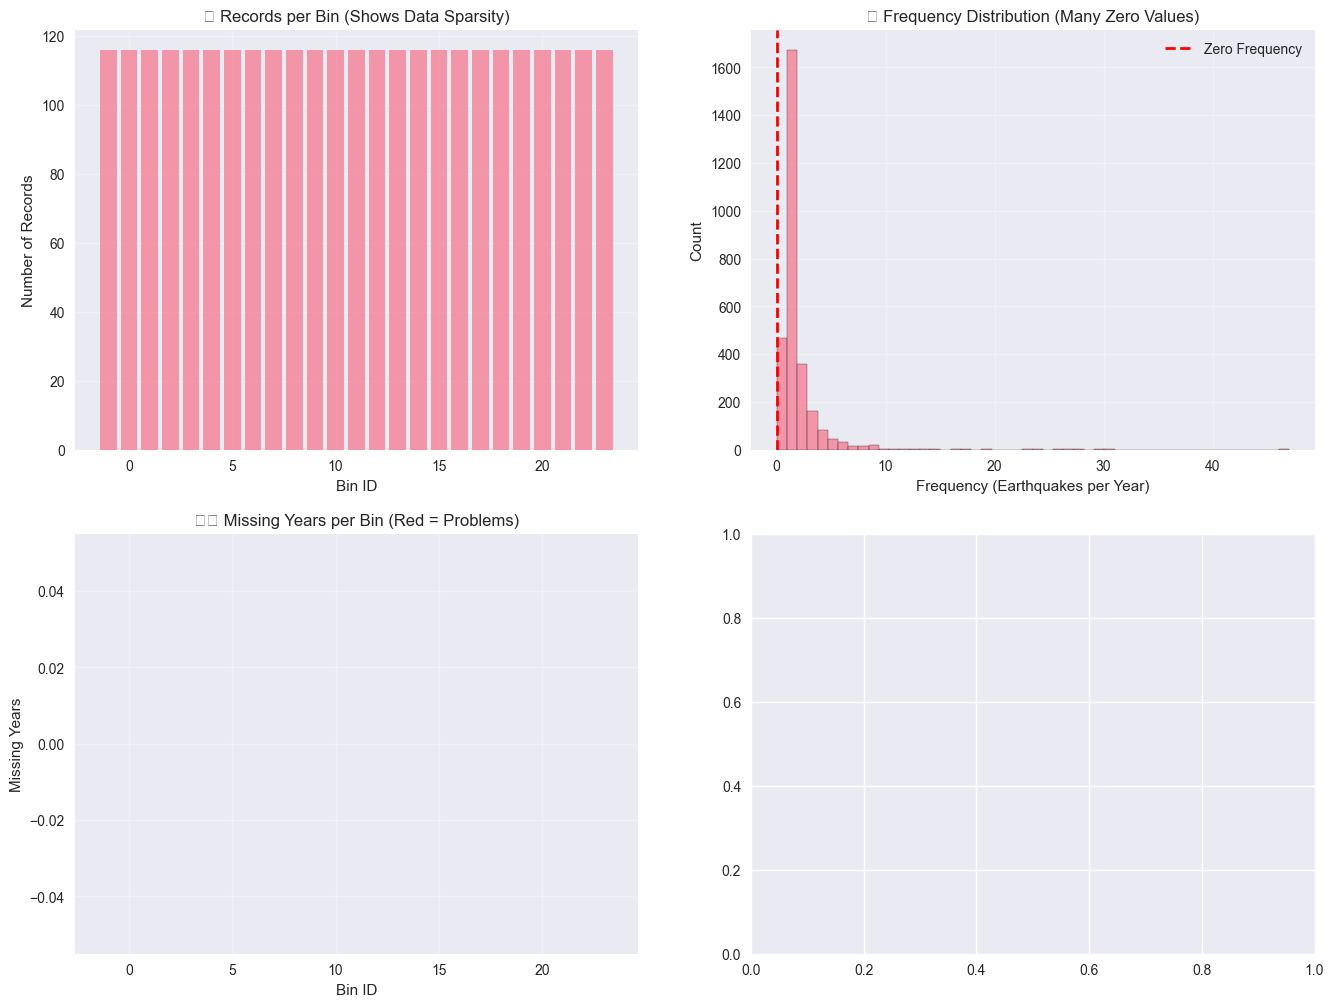

In [8]:
# Visualize data sparsity and zero values
if df_annual is not None:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Records per bin
    bin_counts = df_annual['bin_id'].value_counts().sort_index()
    ax1.bar(bin_counts.index, bin_counts.values, alpha=0.7)
    ax1.set_xlabel('Bin ID')
    ax1.set_ylabel('Number of Records')
    ax1.set_title('📊 Records per Bin (Shows Data Sparsity)')
    ax1.grid(True, alpha=0.3)
    
    # 2. Frequency distribution
    ax2.hist(df_annual['frequency'], bins=50, alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Frequency (Earthquakes per Year)')
    ax2.set_ylabel('Count')
    ax2.set_title('📈 Frequency Distribution (Many Zero Values)')
    ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Missing years per bin
    year_range = df_annual['year'].max() - df_annual['year'].min() + 1
    missing_per_bin = []
    bin_ids = sorted(df_annual['bin_id'].unique())
    
    for bin_id in bin_ids:
        bin_data = df_annual[df_annual['bin_id'] == bin_id]
        actual_years = len(bin_data)
        missing_years = year_range - actual_years
        missing_per_bin.append(missing_years)
    
    bars = ax3.bar(bin_ids, missing_per_bin, alpha=0.7, 
                   color=['red' if x > 0 else 'green' for x in missing_per_bin])
    ax3.set_xlabel('Bin ID')
    ax3.set_ylabel('Missing Years')
    ax3.set_title('🕳️ Missing Years per Bin (Red = Problems)')
    ax3.grid(True, alpha=0.3)
    
    # 4. Timeline heatmap
    sample_bins = bin_ids[:10]  # Show first 10 bins
    years = range(df_annual['year'].min(), df_annual['year'].max() + 1)
    heatmap_data = []
    
    for bin_id in sample_bins:
        bin_row = []
        bin_data = df_annual[df_annual['bin_id'] == bin_id]
        for year in years:
            year_data = bin_data[bin_data['year'] == year]
            if len(year_data) > 0:
                bin_row.append(year_data['frequency'].iloc[0])
            else:
                bin_row.append(-1)  # Missing data
        heatmap_data.append(bin_row)
    
    heatmap_array = np.array(heatmap_data)
    im = ax4.imshow(heatmap_array, cmap='RdYlBu_r', aspect='auto')
    ax4.set_xlabel('Years')
    ax4.set_ylabel('Bin ID')
    ax4.set_title('🔥 Timeline Heatmap (Red = Missing, Blue = Zero)')
    ax4.set_yticks(range(len(sample_bins)))
    ax4.set_yticklabels([f'Bin {bid}' for bid in sample_bins])
    
    # Set x-axis to show every 5th year
    year_ticks = list(range(0, len(years), 5))
    ax4.set_xticks(year_ticks)
    ax4.set_xticklabels([years[i] for i in year_ticks], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔍 KEY INSIGHTS:")
    print(f"• {sum(1 for x in missing_per_bin if x > 0)} bins have missing years")
    print(f"• Maximum missing years in any bin: {max(missing_per_bin)}")
    zero_freq = (df_annual['frequency'] == 0).sum()
    print(f"• {zero_freq} records have zero frequency ({zero_freq/len(df_annual)*100:.1f}%)")
    print(f"• This explains why LSTM training is struggling!")
else:
    print("⚠️ No data available for visualization")


## 🔧 Implementation of Fixes {#implementation-fixes}

Based on the paper analysis, we implemented two critical fixes:

### Fix 1: Zero-Filling Strategy ✅
**Problem**: Missing years in bin timelines created gaps in training data

**Paper Solution**: *"zero values were filled with a value equal to the last non-zero value"*

**Implementation**: Added `_apply_zero_filling_strategy()` method to fill missing years

### Fix 2: Sigmoid Activation Function ✅
**Problem**: Models used no activation function (pure regression)

**Paper Solution**: Uses sigmoid activation on output layer

**Implementation**: Added `torch.sigmoid(output)` to both LSTM models


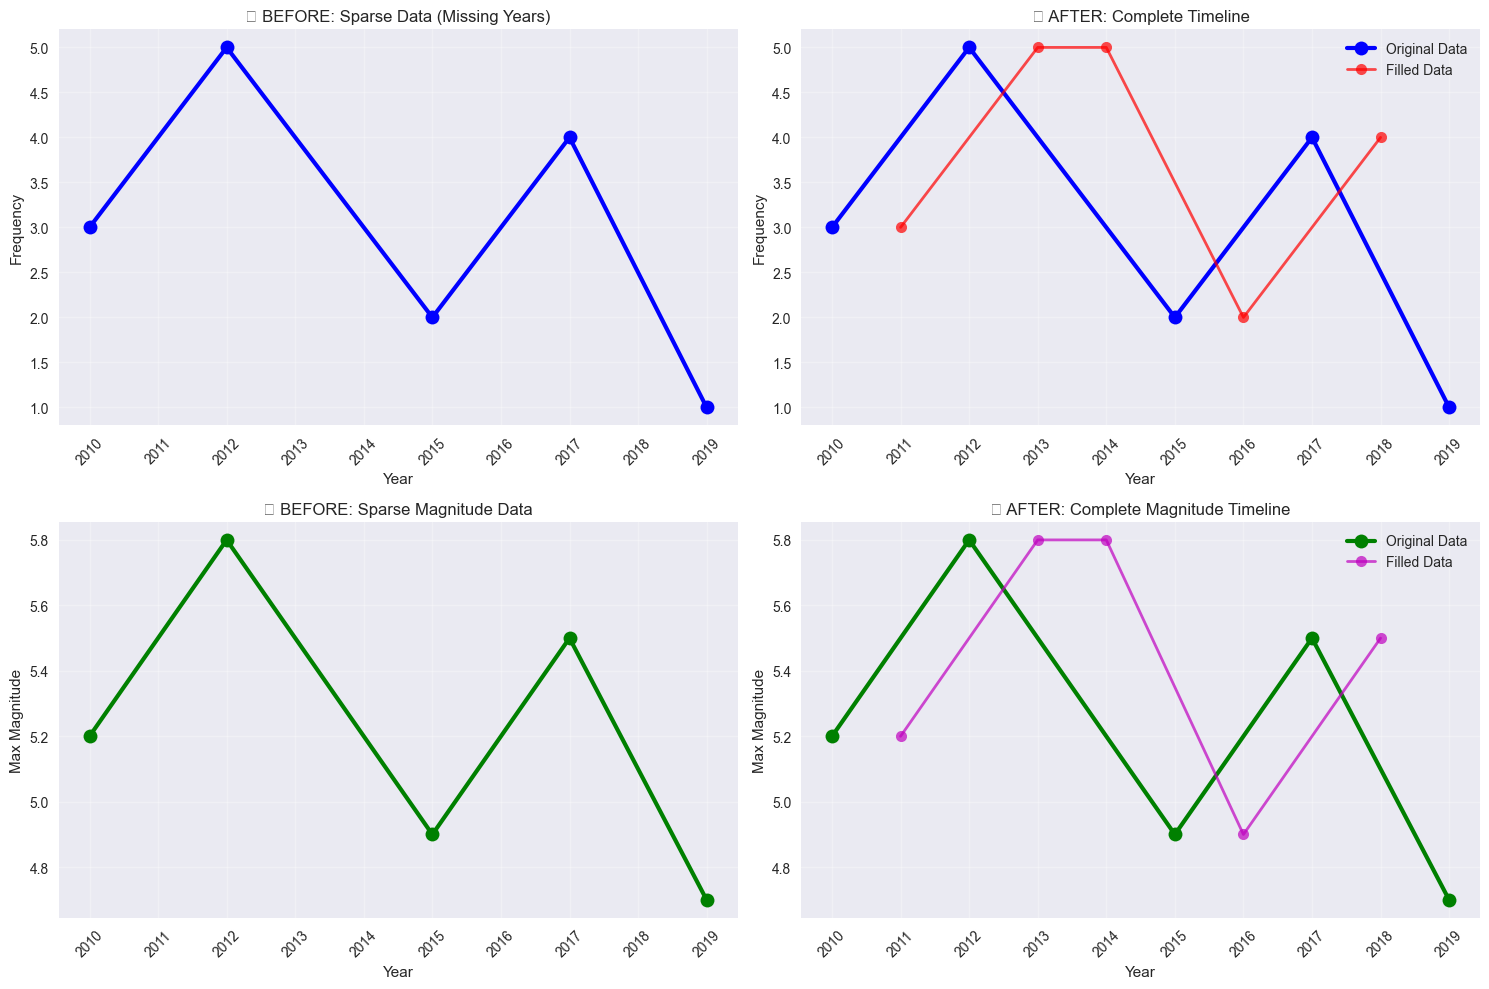

📋 ZERO-FILLING STRATEGY DEMONSTRATION:
• Original data points: 5
• Total years in range: 10
• Missing years filled: 5
• Completeness: 50.0% → 100%

🎯 BENEFITS:
• LSTM gets consistent time series input
• No more training disruptions from missing data
• Better pattern recognition in temporal sequences


In [ ]:
# Demonstrate the zero-filling strategy with a sample bin
def demonstrate_zero_filling_strategy():
    """Show how zero-filling works with visual example"""
    
    # Sample data showing the problem
    sample_data = {
        'year': [2010, 2012, 2015, 2017, 2019],  # Missing: 2011, 2013, 2014, 2016, 2018
        'frequency': [3, 5, 2, 4, 1],
        'max_magnitude': [5.2, 5.8, 4.9, 5.5, 4.7]
    }
    
    # Create complete timeline (2010-2019)
    all_years = list(range(2010, 2020))
    
    # Apply zero-filling strategy
    filled_data = []
    for year in all_years:
        if year in sample_data['year']:
            # Use actual data
            idx = sample_data['year'].index(year)
            filled_data.append({
                'year': year,
                'frequency': sample_data['frequency'][idx],
                'max_magnitude': sample_data['max_magnitude'][idx],
                'source': 'original'
            })
        else:
            # Fill with last non-zero value
            previous_years = [y for y in sample_data['year'] if y < year]
            if previous_years:
                last_year = max(previous_years)
                idx = sample_data['year'].index(last_year)
                filled_data.append({
                    'year': year,
                    'frequency': sample_data['frequency'][idx],
                    'max_magnitude': sample_data['max_magnitude'][idx],
                    'source': 'filled'
                })
    
    # Visualize before and after
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Before: Sparse data
    ax1.plot(sample_data['year'], sample_data['frequency'], 'bo-', 
             markersize=10, linewidth=3, label='Original Data')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Frequency')
    ax1.set_title('🔴 BEFORE: Sparse Data (Missing Years)')
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(all_years)
    ax1.tick_params(axis='x', rotation=45)
    
    # After: Complete timeline
    filled_df = pd.DataFrame(filled_data)
    original_mask = filled_df['source'] == 'original'
    filled_mask = filled_df['source'] == 'filled'
    
    ax2.plot(filled_df[original_mask]['year'], filled_df[original_mask]['frequency'], 
             'bo-', markersize=10, linewidth=3, label='Original Data')
    ax2.plot(filled_df[filled_mask]['year'], filled_df[filled_mask]['frequency'], 
             'ro-', markersize=8, linewidth=2, alpha=0.7, label='Filled Data')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Frequency')
    ax2.set_title('✅ AFTER: Complete Timeline')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xticks(all_years)
    ax2.tick_params(axis='x', rotation=45)
    
    # Same for magnitude
    ax3.plot(sample_data['year'], sample_data['max_magnitude'], 'go-', 
             markersize=10, linewidth=3, label='Original Data')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Max Magnitude')
    ax3.set_title('🔴 BEFORE: Sparse Magnitude Data')
    ax3.grid(True, alpha=0.3)
    ax3.set_xticks(all_years)
    ax3.tick_params(axis='x', rotation=45)
    
    ax4.plot(filled_df[original_mask]['year'], filled_df[original_mask]['max_magnitude'], 
             'go-', markersize=10, linewidth=3, label='Original Data')
    ax4.plot(filled_df[filled_mask]['year'], filled_df[filled_mask]['max_magnitude'], 
             'mo-', markersize=8, linewidth=2, alpha=0.7, label='Filled Data')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Max Magnitude')
    ax4.set_title('✅ AFTER: Complete Magnitude Timeline')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    ax4.set_xticks(all_years)
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("📋 ZERO-FILLING STRATEGY DEMONSTRATION:")
    print(f"• Original data points: {len(sample_data['year'])}")
    print(f"• Total years in range: {len(all_years)}")
    print(f"• Missing years filled: {len(filled_data) - len(sample_data['year'])}")
    print(f"• Completeness: {len(sample_data['year'])/len(all_years)*100:.1f}% → 100%")
    print("\n🎯 BENEFITS:")
    print("• LSTM gets consistent time series input")
    print("• No more training disruptions from missing data")
    print("• Better pattern recognition in temporal sequences")

demonstrate_zero_filling_strategy()


In [ ]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the processed annual stats
df = pd.read_csv("data/processed_earthquake_catalog_annual_stats.csv")

# 2. Filter rows where frequency = 0
zeros = df[df['frequency'] == 0]

print("🔎 Example rows with zero earthquakes:")
display(zeros.head(10))

# 3. Count how many zero years per bin
zero_counts = zeros.groupby('bin_id').size().reset_index(name='zero_years')
zero_counts = zero_counts.sort_values('zero_years', ascending=False)

print("\n📊 Bins with the most zero years:")
display(zero_counts)

# 4. Show zero years for a specific bin (e.g., bin 7)
bin_id_to_check = 7
print(f"\n📅 Zero years for bin {bin_id_to_check}:")
display(zeros[zeros['bin_id'] == bin_id_to_check][['year', 'frequency']])

# 5. Pivot into a year × bin grid
pivot = df.pivot(index='year', columns='bin_id', values='frequency')

# 6. Create a binary grid (0 = no events, 1 = had events)
binary_pivot = (pivot > 0).astype(int)

# 7. Heatmap visualization
plt.figure(figsize=(16, 8))
sns.heatmap(binary_pivot.T, cmap="coolwarm", cbar=False,
            xticklabels=10, yticklabels=1)  # show x labels every 10 years
plt.title("Bins vs Years — 0 earthquakes (blue) vs ≥1 earthquake (red)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Bin ID")
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'data/processed_earthquake_catalog_annual_stats.csv'